In [1]:
import napari
from napari_assistant._gui._Assistant import Assistant
from skimage.io import imread
from napari_assistant._categories import CATEGORIES
from napari_assistant._workflow_io_utility import initialise_root_functions, load_remaining_workflow
from napari_assistant._undo_redo import delete_workflow_widgets_layers
from napari_workflows import WorkflowManager

filename = 'C:/Users/ryans/OneDrive/Desktop/blobs.tif'
blobs = imread(filename)
blobs_modified = imread('C:/Users/ryans/OneDrive/Desktop/blobs_messed_up.tiff') 

viewer = napari.Viewer()
viewer.add_image(blobs_modified, name = 'not blobs')
viewer.add_image(blobs, name = 'blobs')

manager = WorkflowManager.install(viewer)
assistant = Assistant(viewer)
viewer.window.add_dock_widget(assistant)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


2022-04-28 13:30:27.681 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-04-28 13:30:27.868 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


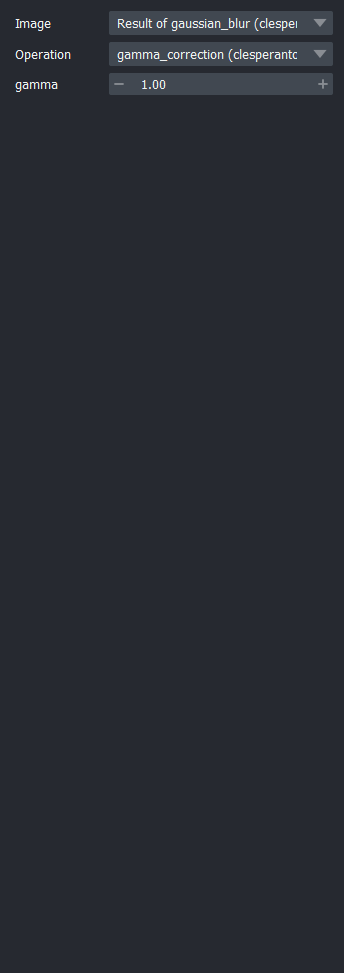

In [2]:
noise_widget = assistant._activate(CATEGORIES.get("Remove noise"))
assistant._activate(CATEGORIES.get("Filter"))

In [3]:
controller = manager.undo_redo_controller
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)



In [4]:
noise_widget["x"].value = 4

2022-04-28 13:30:28.796 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-04-28 13:30:28.825 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


In [5]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [6]:
noise_widget["x"].value = 8
for i in controller.undo_stack:
    print(i)

2022-04-28 13:30:28.964 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 13:30:29.006 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [7]:
noise_widget["x"].value = 9
for i in controller.undo_stack:
    print(i)

2022-04-28 13:30:29.118 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-28 13:30:29.151 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



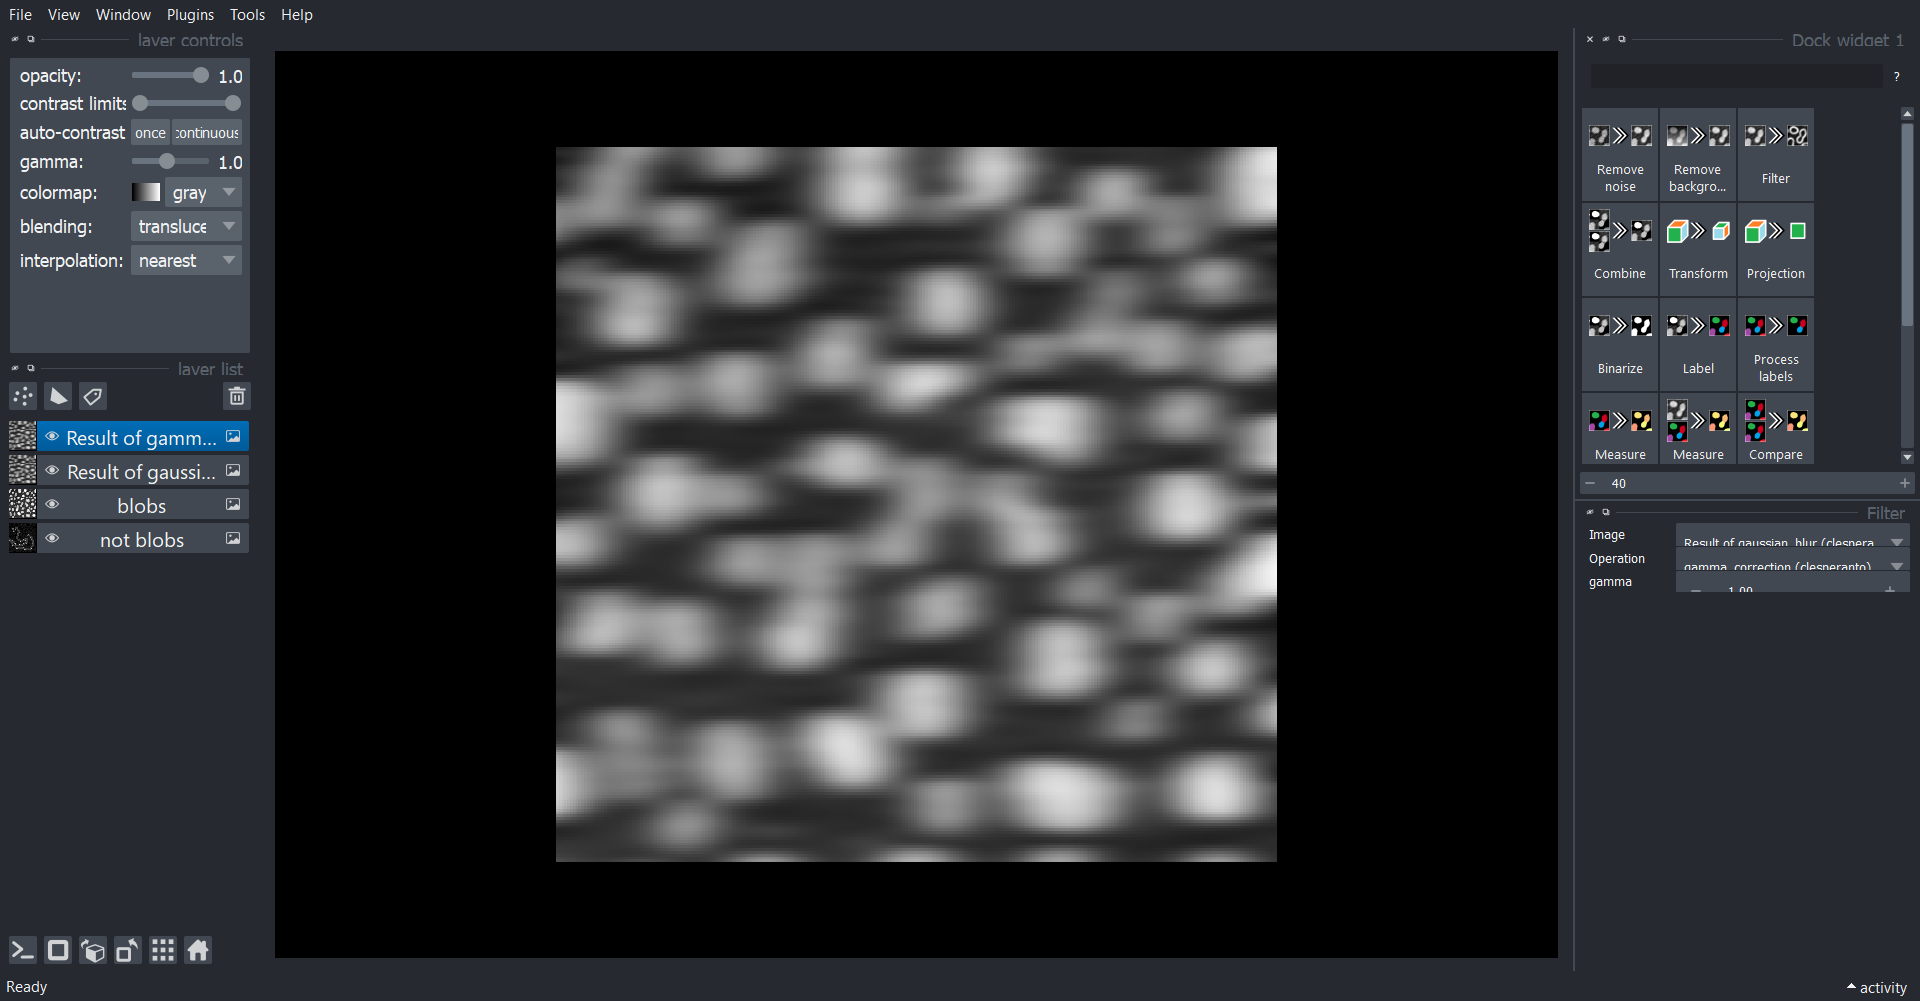

In [8]:
napari.utils.nbscreenshot(viewer)

In [9]:
assistant.undo_action()
for i in controller.undo_stack:
    print(i)
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-04-28 13:30:30.595 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 13:30:30.618 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



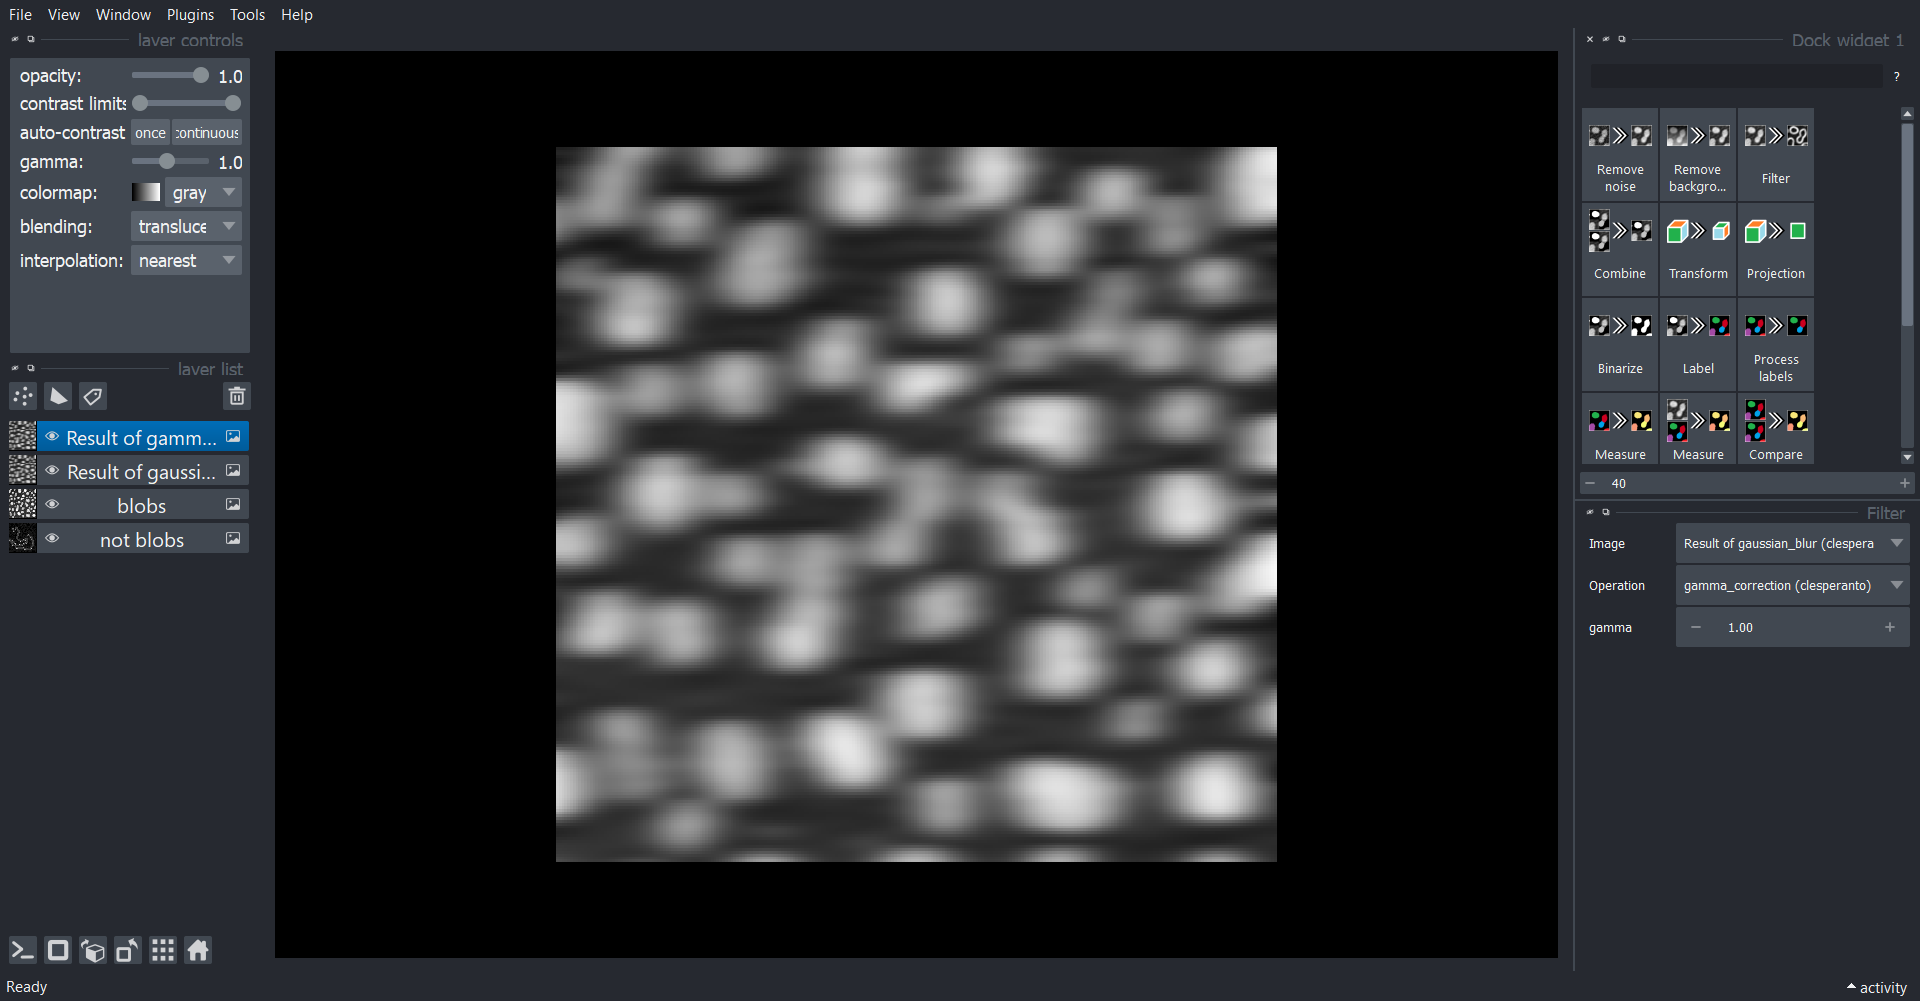

In [10]:
napari.utils.nbscreenshot(viewer)

In [11]:
controller.redo_stack

In [12]:
assistant.redo_action()
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-04-28 13:30:32.691 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-28 13:30:32.712 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 9.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [13]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x000001E938180790>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x000001E9381F8790>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [14]:
controller.redo_stack

[]

2022-04-28 13:30:48.690 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 13:30:48.732 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 13:30:50.914 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-04-28 13:30:50.954 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 13:30:53.162 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-04-28 13:30:53.203 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 13:30:56.102 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-04-28 13:30:56.177 | INFO     | napari_assistant._